In [424]:
import pandas as pd
import matplotlib.pyplot as plt

In [425]:
df = pd.read_csv("dataset_mood_smartphone.csv")

In [426]:
df

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [427]:
df.isnull().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

In [428]:
df.duplicated().sum()

0

In [429]:
df.dtypes

Unnamed: 0      int64
id             object
time           object
variable       object
value         float64
dtype: object

In [430]:
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date
df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)

df

,index,id,time,variable,value,date
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000,2014-02-26
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000,2014-02-26
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000,2014-02-26
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000,2014-02-26
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000,2014-02-27
...,...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032,2014-04-11
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008,2014-04-19
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026,2014-04-26
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033,2014-04-27


In [431]:
# Assuming 'df' is your DataFrame that includes a 'variable' column
variable_values_list = df['variable'].unique().tolist()

# Now 'variable_values_list' contains all unique variable values as a list
print(variable_values_list)


['mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 'appCat.weather']


# Scores

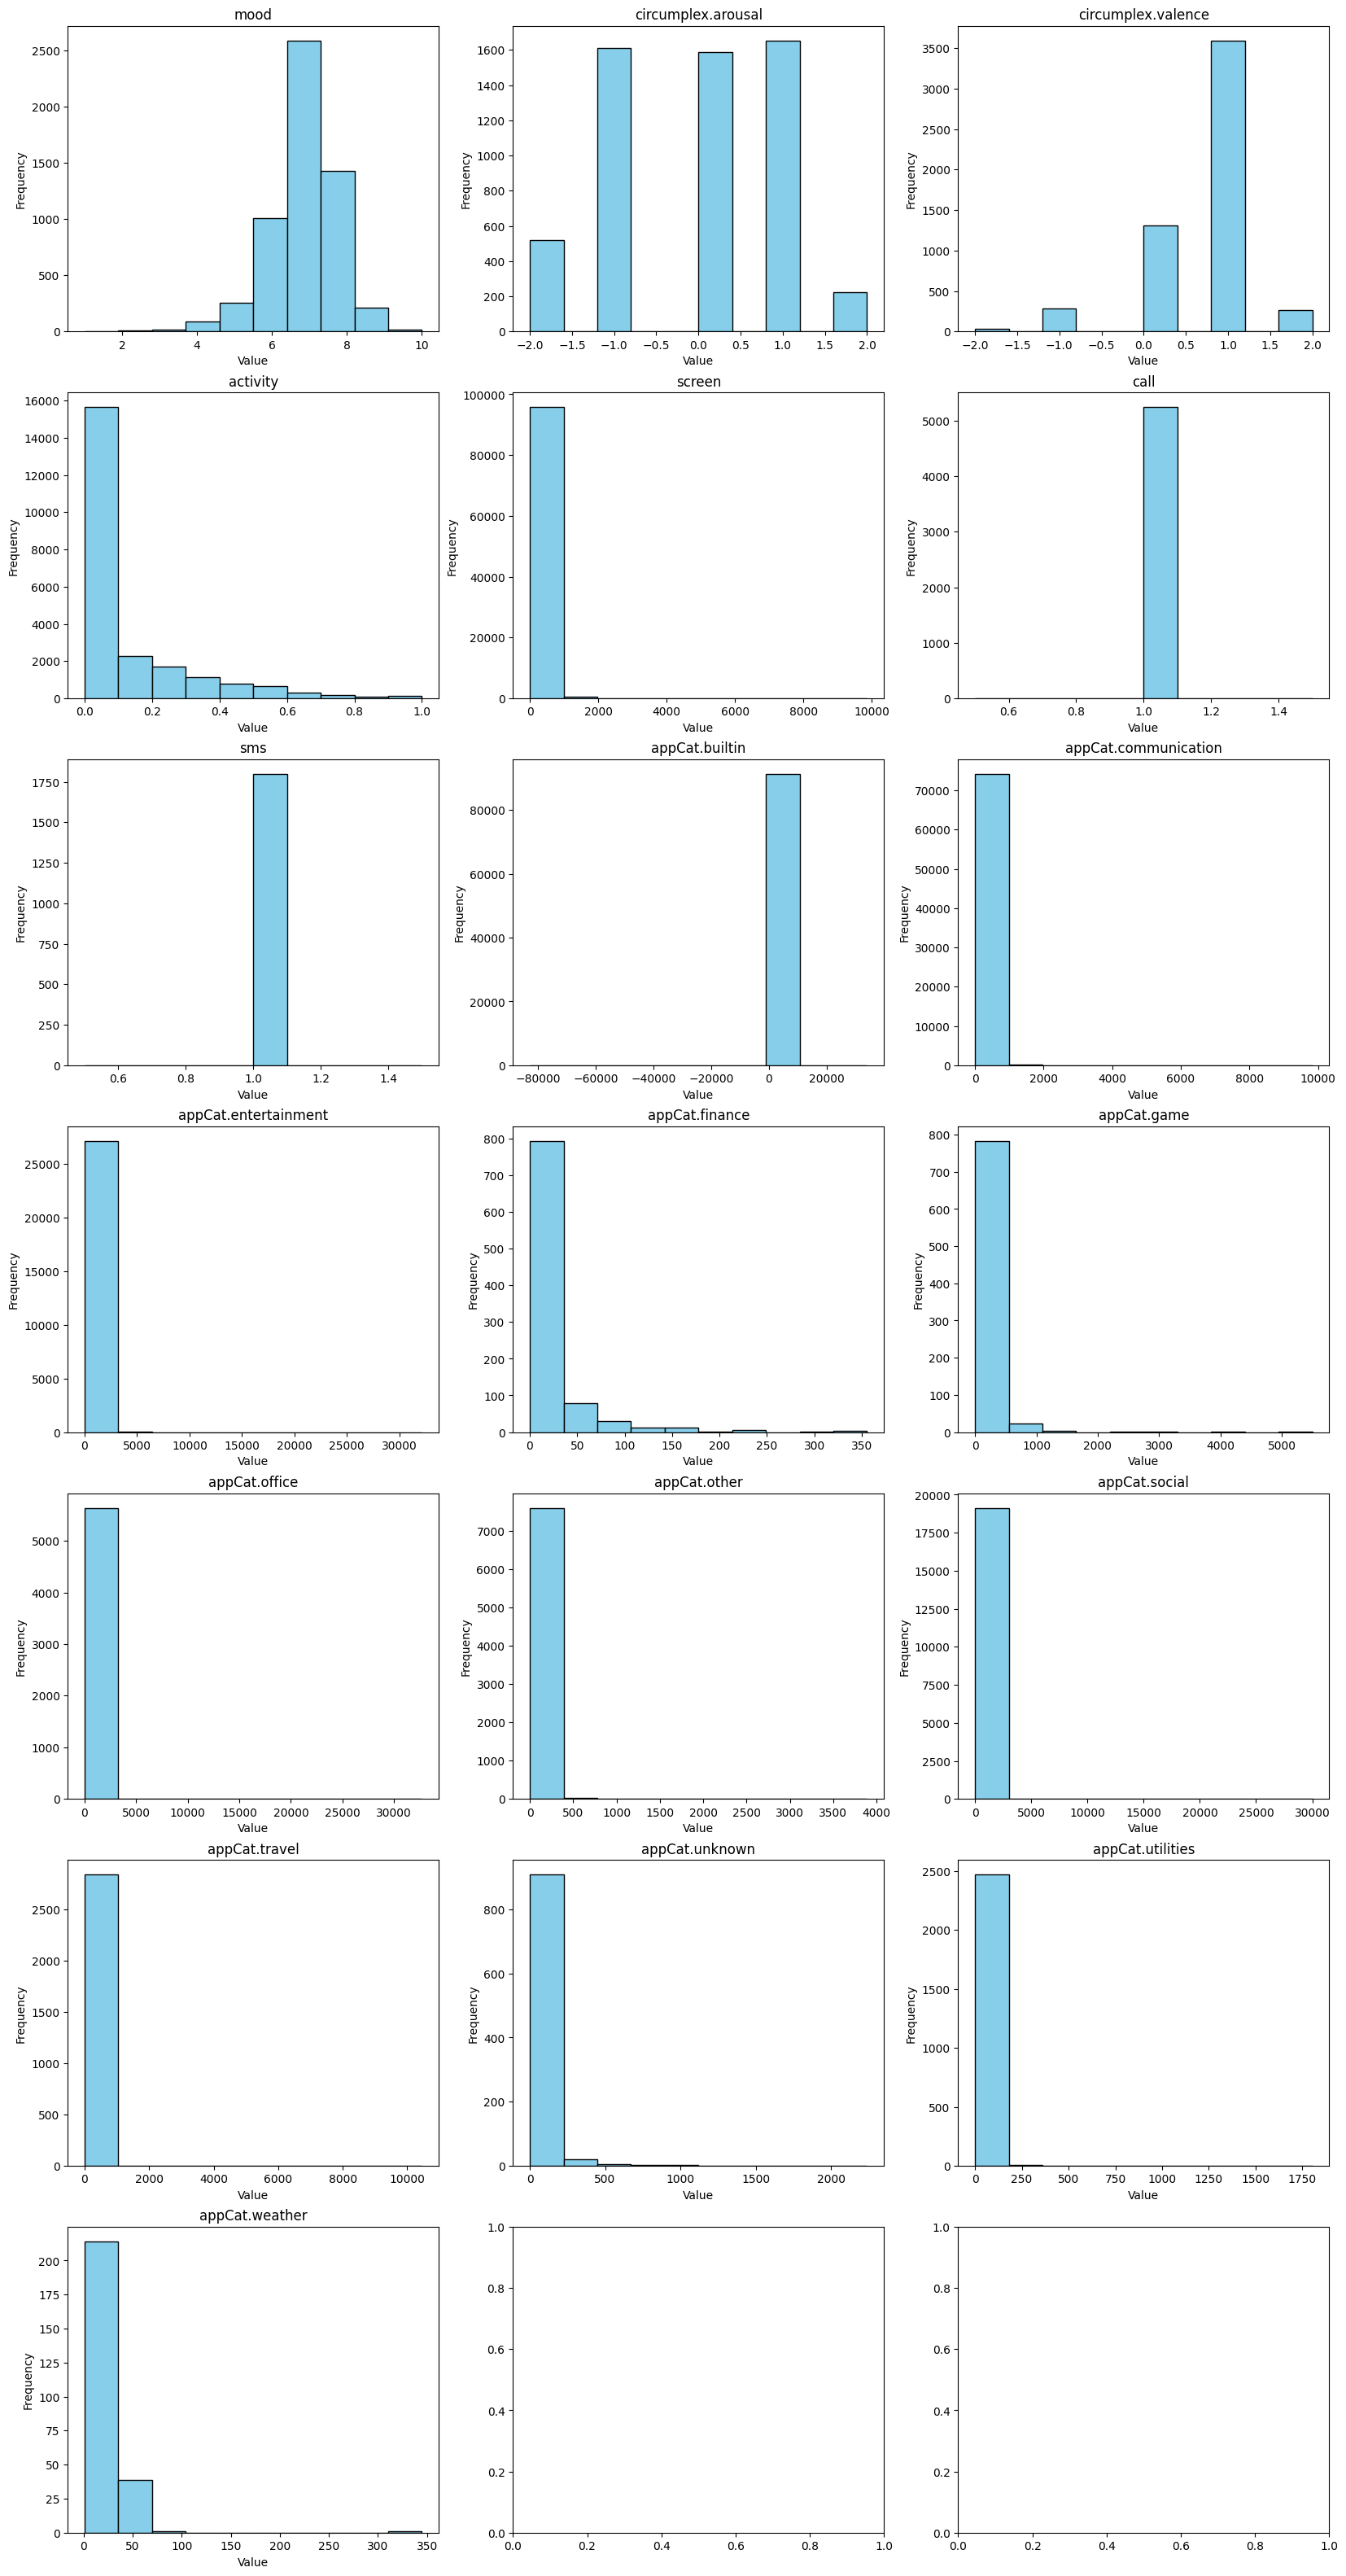

In [432]:
# Preparing the figure to plot histograms for a subset of variables
fig, axs = plt.subplots(7, 3, figsize=(20, 40))
axs = axs.flatten()  # Flatten the array for easy iteration

# Selecting a manageable subset of variables for histograms
#scores = ['mood', 'circumplex.arousal', 'circumplex.valence','activity']  # Adjust based on how many you wish to plot
variables = [
    'mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'call', 'sms',
    'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game',
    'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown',
    'appCat.utilities', 'appCat.weather'
]

for ax, variable in zip(axs, variables):
    var_df = df[df['variable'] == variable]
    ax.hist(var_df['value'], color='skyblue', edgecolor='black')
    ax.set_title(variable)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

#plt.tight_layout()
plt.show()

In [433]:
# Filter the dataset for mood, arousal, and valence
mood_data = df[df['variable'] == 'mood']
arousal_data = df[df['variable'] == 'circumplex.arousal']
valence_data = df[df['variable'] == 'circumplex.valence']
activity_data = df[df['variable'] == 'activity']

# Check the range of values and presence of NaN values for mood, arousal, and valence
mood_range = (mood_data['value'].min(), mood_data['value'].max(), mood_data['value'].isnull().sum(axis = 0))
arousal_range = (arousal_data['value'].min(), arousal_data['value'].max(), arousal_data['value'].isnull().sum(axis = 0))
valence_range = (valence_data['value'].min(), valence_data['value'].max(), valence_data['value'].isnull().sum(axis = 0))
activity_range = (activity_data['value'].min(), activity_data['value'].max(), activity_data['value'].isnull().sum(axis = 0))

mood_range, arousal_range, valence_range, activity_range


((1.0, 10.0, 0), (-2.0, 2.0, 46), (-2.0, 2.0, 156), (0.0, 1.0, 0))

In [434]:
mood_data['time'].nunique(), arousal_data['time'].nunique(), valence_data['time'].nunique(), activity_data['time'].nunique()

(1113, 1113, 1113, 1982)

In [435]:
mood_data['date'].nunique(), arousal_data['date'].nunique(), valence_data['date'].nunique(), activity_data['date'].nunique()

(98, 98, 98, 85)

In [436]:
# Assuming 'df' is your loaded DataFrame containing all the variables
# Convert 'time' column to datetime if not already
variables = [
    'mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'call', 'sms',
    'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game',
    'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown',
    'appCat.utilities', 'appCat.weather'
]
# Get unique dates for each variable
unique_dates = {var: df[df['variable'] == var]['date'].nunique() for var in variables}
unique_times = {var: df[df['variable'] == var]['time'].nunique() for var in variables}

# Identify the date range for each variable
date_ranges = {var: (df[df['variable'] == var]['time'].min(), df[df['variable'] == var]['time'].max()) for var in variables}

print("Unique Times:", unique_times)
print("Unique Dates:", unique_dates)
print("Date Ranges:", date_ranges)

Unique Times: {'mood': 1113, 'circumplex.arousal': 1113, 'circumplex.valence': 1113, 'activity': 1982, 'screen': 96578, 'call': 5239, 'sms': 1798, 'appCat.builtin': 91286, 'appCat.communication': 74272, 'appCat.entertainment': 27125, 'appCat.finance': 939, 'appCat.game': 813, 'appCat.office': 5642, 'appCat.other': 7650, 'appCat.social': 19145, 'appCat.travel': 2846, 'appCat.unknown': 939, 'appCat.utilities': 2487, 'appCat.weather': 255}
Unique Dates: {'mood': 98, 'circumplex.arousal': 98, 'circumplex.valence': 98, 'activity': 85, 'screen': 88, 'call': 109, 'sms': 103, 'appCat.builtin': 88, 'appCat.communication': 88, 'appCat.entertainment': 80, 'appCat.finance': 53, 'appCat.game': 51, 'appCat.office': 61, 'appCat.other': 88, 'appCat.social': 86, 'appCat.travel': 70, 'appCat.unknown': 67, 'appCat.utilities': 77, 'appCat.weather': 52}
Date Ranges: {'mood': (Timestamp('2014-02-26 13:00:00'), Timestamp('2014-06-08 09:00:00')), 'circumplex.arousal': (Timestamp('2014-02-26 13:00:00'), Timest

In [437]:
data_for_df = {
    'Variable': [],
    'Unique Times': [],
    'Unique Dates': [],
    'Date Range Start': [],
    'Date Range End': []
}

# Populate the dictionary with data for each variable
for var in variables:
    data_for_df['Variable'].append(var)
    data_for_df['Unique Times'].append(df[df['variable'] == var]['time'].nunique())
    data_for_df['Unique Dates'].append(df[df['variable'] == var]['date'].nunique())
    data_for_df['Date Range Start'].append(df[df['variable'] == var]['time'].min())
    data_for_df['Date Range End'].append(df[df['variable'] == var]['time'].max())

# Create the DataFrame
variables_df = pd.DataFrame(data_for_df)

# Display the resulting DataFrame
variables_df

,Variable,Unique Times,Unique Dates,Date Range Start,Date Range End
0,mood,1113,98,2014-02-26 13:00:00.000,2014-06-08 09:00:00.000
1,circumplex.arousal,1113,98,2014-02-26 13:00:00.000,2014-06-08 09:00:00.000
2,circumplex.valence,1113,98,2014-02-26 13:00:00.000,2014-06-08 09:00:00.000
3,activity,1982,85,2014-03-17 14:00:00.000,2014-06-09 00:00:00.000
4,screen,96578,88,2014-03-13 15:41:07.421,2014-06-08 10:54:22.891
5,call,5239,109,2014-02-17 07:00:52.197,2014-06-06 18:39:08.447
6,sms,1798,103,2014-02-17 07:49:19.635,2014-06-07 11:42:55.040
7,appCat.builtin,91286,88,2014-03-13 15:40:17.345,2014-06-08 11:04:46.335
8,appCat.communication,74272,88,2014-03-13 16:05:42.357,2014-06-08 09:28:09.022
9,appCat.entertainment,27125,80,2014-03-13 23:25:24.816,2014-06-02 17:49:34.907


## nan values scores

In [438]:
nan_rows_arousal = df[(df['variable'] == 'circumplex.arousal') & (df['value'].isna())].index
nan_rows_valence = df[(df['variable'] == 'circumplex.valence') & (df['value'].isna())].index
nan_rows_activity = df[(df['variable'] == 'activity') & (df['value'].isna())].index


# Combine the indices of rows with NaN values for arousal and valence
nan_rows_combined = nan_rows_arousal.union(nan_rows_valence)

In [439]:
nan_rows_combined

Index([ 5708,  5730,  5772,  5796,  5835,  6324,  6378,  6433,  6667,  6792,
       ...
       16802, 16808, 16814, 16851, 16852, 16858, 16861, 16881, 16898, 16902],
      dtype='int64', length=202)

In [440]:
df_nan = df.loc[nan_rows_combined]
df_nan.shape

(202, 6)

## negative values in time

In [441]:
# List of variables/categories to check for negative values, excluding mood, arousal, and valence
variables_to_check = [variable for variable in df['variable'].unique() if variable not in ['mood', 'circumplex.arousal', 'circumplex.valence']]

# Check for negative values in the remaining variables
negative_values_check = {variable: (df[df['variable'] == variable]['value'] < 0).any() for variable in variables_to_check}

negative_values_check

# Identify rows with negative values in appCat.builtin and appCat.entertainment in the original dataset
negative_values_builtin = df[(df['variable'] == 'appCat.builtin') & (df['value'] < 0)].index
negative_values_entertainment = df[(df['variable'] == 'appCat.entertainment') & (df['value'] < 0)].index

#neg combined 
neg = negative_values_builtin.union(negative_values_entertainment)
# Combine the indices of rows with negative values for appCat.builtin and appCat.entertainment
# with previously identified NaN rows for removal
remove_combined = nan_rows_combined.union(negative_values_builtin).union(negative_values_entertainment)

df_negative = df.loc[neg]

In [442]:
df_negative

,index,id,time,variable,value,date
150040,151512,AS14.02,2014-03-16 15:46:43.769,appCat.builtin,-44.689,2014-03-16
159972,622771,AS14.07,2014-04-30 14:18:06.200,appCat.builtin,-82798.871,2014-04-30
162154,754571,AS14.12,2014-04-02 16:42:16.523,appCat.builtin,-1.218,2014-04-02
309805,484694,AS14.02,2014-03-26 21:18:45.144,appCat.entertainment,-0.011,2014-03-26


## nan scores plus neg times

In [443]:
combined = df.loc[remove_combined]

combined

,index,id,time,variable,value,date
5708,5709,AS14.01,2014-04-02 18:00:00.000,circumplex.arousal,NaN,2014-04-02
5730,5731,AS14.01,2014-04-07 15:00:00.000,circumplex.arousal,NaN,2014-04-07
5772,5773,AS14.01,2014-04-16 12:00:00.000,circumplex.arousal,NaN,2014-04-16
5796,5797,AS14.01,2014-04-21 13:00:00.000,circumplex.arousal,NaN,2014-04-21
5835,5836,AS14.01,2014-04-29 09:00:00.000,circumplex.arousal,NaN,2014-04-29
...,...,...,...,...,...,...
16902,16903,AS14.33,2014-05-25 21:00:00.000,circumplex.valence,NaN,2014-05-25
150040,151512,AS14.02,2014-03-16 15:46:43.769,appCat.builtin,-44.689,2014-03-16
159972,622771,AS14.07,2014-04-30 14:18:06.200,appCat.builtin,-82798.871,2014-04-30
162154,754571,AS14.12,2014-04-02 16:42:16.523,appCat.builtin,-1.218,2014-04-02


# Clean datasets

In [444]:
df1 = df.drop(combined.index)

In [445]:
# Assuming 'df' is your loaded DataFrame containing all the variables
# Convert 'time' column to datetime if not already
variables = [
    'mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'call', 'sms',
    'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game',
    'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown',
    'appCat.utilities', 'appCat.weather'
]
# Get unique dates for each variable
unique_dates = {var: df1[df1['variable'] == var]['date'].nunique() for var in variables}
unique_times = {var: df1[df1['variable'] == var]['time'].nunique() for var in variables}

# Identify the date range for each variable
date_ranges = {var: (df1[df1['variable'] == var]['time'].min(), df[df['variable'] == var]['time'].max()) for var in variables}

print("Unique Times:", unique_times)
print("Unique Dates:", unique_dates)
print("Date Ranges:", date_ranges)

Unique Times: {'mood': 1113, 'circumplex.arousal': 1106, 'circumplex.valence': 1094, 'activity': 1982, 'screen': 96578, 'call': 5239, 'sms': 1798, 'appCat.builtin': 91283, 'appCat.communication': 74272, 'appCat.entertainment': 27124, 'appCat.finance': 939, 'appCat.game': 813, 'appCat.office': 5642, 'appCat.other': 7650, 'appCat.social': 19145, 'appCat.travel': 2846, 'appCat.unknown': 939, 'appCat.utilities': 2487, 'appCat.weather': 255}
Unique Dates: {'mood': 98, 'circumplex.arousal': 98, 'circumplex.valence': 97, 'activity': 85, 'screen': 88, 'call': 109, 'sms': 103, 'appCat.builtin': 88, 'appCat.communication': 88, 'appCat.entertainment': 80, 'appCat.finance': 53, 'appCat.game': 51, 'appCat.office': 61, 'appCat.other': 88, 'appCat.social': 86, 'appCat.travel': 70, 'appCat.unknown': 67, 'appCat.utilities': 77, 'appCat.weather': 52}
Date Ranges: {'mood': (Timestamp('2014-02-26 13:00:00'), Timestamp('2014-06-08 09:00:00')), 'circumplex.arousal': (Timestamp('2014-02-26 13:00:00'), Timest

In [446]:
data_for_df1 = {
    'Variable': [],
    'Unique Times': [],
    'Unique Dates': [],
    'Date Range Start': [],
    'Date Range End': []
}

# Populate the dictionary with data for each variable
for var in variables:
    data_for_df1['Variable'].append(var)
    data_for_df1['Unique Times'].append(df[df['variable'] == var]['time'].nunique())
    data_for_df1['Unique Dates'].append(df[df['variable'] == var]['date'].nunique())
    data_for_df1['Date Range Start'].append(df[df['variable'] == var]['time'].min())
    data_for_df1['Date Range End'].append(df[df['variable'] == var]['time'].max())

# Create the DataFrame
variables_df1 = pd.DataFrame(data_for_df)

# Display the resulting DataFrame
variables_df1

,Variable,Unique Times,Unique Dates,Date Range Start,Date Range End
0,mood,1113,98,2014-02-26 13:00:00.000,2014-06-08 09:00:00.000
1,circumplex.arousal,1113,98,2014-02-26 13:00:00.000,2014-06-08 09:00:00.000
2,circumplex.valence,1113,98,2014-02-26 13:00:00.000,2014-06-08 09:00:00.000
3,activity,1982,85,2014-03-17 14:00:00.000,2014-06-09 00:00:00.000
4,screen,96578,88,2014-03-13 15:41:07.421,2014-06-08 10:54:22.891
5,call,5239,109,2014-02-17 07:00:52.197,2014-06-06 18:39:08.447
6,sms,1798,103,2014-02-17 07:49:19.635,2014-06-07 11:42:55.040
7,appCat.builtin,91286,88,2014-03-13 15:40:17.345,2014-06-08 11:04:46.335
8,appCat.communication,74272,88,2014-03-13 16:05:42.357,2014-06-08 09:28:09.022
9,appCat.entertainment,27125,80,2014-03-13 23:25:24.816,2014-06-02 17:49:34.907


### scores and time

In [447]:
score_variables = ["mood", "circumplex.arousal", "circumplex.valence", "activity"]

# Creating a dataset with only the selected variables
df_score = df1[df1['variable'].isin(score_variables)]

# Creating another dataset with the rest of the variables
df_machine = df1[~df1['variable'].isin(score_variables)]

df_score['date'] = df_score['time'].dt.date
df_machine['date'] = df_machine['time'].dt.date


/var/folders/_1/g4tvh5tn2wb8t1qyc72n4cdr0000gn/T/ipykernel_80057/3639623860.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['date'] = df_score['time'].dt.date
/var/folders/_1/g4tvh5tn2wb8t1qyc72n4cdr0000gn/T/ipykernel_80057/3639623860.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_machine['date'] = df_machine['time'].dt.date


In [448]:
df_score

,index,id,time,variable,value,date
0,1,AS14.01,2014-02-26 13:00:00,mood,6.000000,2014-02-26
1,2,AS14.01,2014-02-26 15:00:00,mood,6.000000,2014-02-26
2,3,AS14.01,2014-02-26 18:00:00,mood,6.000000,2014-02-26
3,4,AS14.01,2014-02-26 21:00:00,mood,7.000000,2014-02-26
4,5,AS14.01,2014-02-27 09:00:00,mood,6.000000,2014-02-27
...,...,...,...,...,...,...
39887,39888,AS14.33,2014-05-30 16:00:00,activity,0.250000,2014-05-30
39888,39889,AS14.33,2014-05-30 19:00:00,activity,0.035714,2014-05-30
39889,39890,AS14.33,2014-05-30 20:00:00,activity,0.008403,2014-05-30
39890,39891,AS14.33,2014-05-30 21:00:00,activity,0.017094,2014-05-30


In [449]:
df_scores_daily = df_score.drop('time', axis = 1)
df_machine_daily = df_machine.drop('time', axis = 1)

In [450]:
df_scores_daily
#df_scores_daily.to_csv('scores_daily.csv')

,index,id,variable,value,date
0,1,AS14.01,mood,6.000000,2014-02-26
1,2,AS14.01,mood,6.000000,2014-02-26
2,3,AS14.01,mood,6.000000,2014-02-26
3,4,AS14.01,mood,7.000000,2014-02-26
4,5,AS14.01,mood,6.000000,2014-02-27
...,...,...,...,...,...
39887,39888,AS14.33,activity,0.250000,2014-05-30
39888,39889,AS14.33,activity,0.035714,2014-05-30
39889,39890,AS14.33,activity,0.008403,2014-05-30
39890,39891,AS14.33,activity,0.017094,2014-05-30


In [451]:
grouped_scores = df_scores_daily.groupby(['id', 'date', 'variable'])['value'].mean().reset_index()
grouped_scores

,id,date,variable,value
0,AS14.01,2014-02-26,circumplex.arousal,-0.250000
1,AS14.01,2014-02-26,circumplex.valence,0.750000
2,AS14.01,2014-02-26,mood,6.250000
3,AS14.01,2014-02-27,circumplex.arousal,0.000000
4,AS14.01,2014-02-27,circumplex.valence,0.333333
...,...,...,...,...
4985,AS14.33,2014-05-30,circumplex.valence,-0.400000
4986,AS14.33,2014-05-30,mood,6.800000
4987,AS14.33,2014-05-31,circumplex.arousal,-2.000000
4988,AS14.33,2014-05-31,circumplex.valence,1.000000


In [452]:
piv_scores = df_scores_daily.groupby(['id','date', 'variable'])['value'].mean().unstack()
#grouped_activities = df_scores_daily.groupby(['id','date', 'variable'])['value'].mean().unstack().fillna(0)

In [453]:
grouped_times = df_machine_daily.groupby(['id', 'date', 'variable'])['value'].sum().reset_index()
grouped_times

,id,date,variable,value
0,AS14.01,2014-02-17,call,2.000000
1,AS14.01,2014-02-18,call,1.000000
2,AS14.01,2014-02-19,call,7.000000
3,AS14.01,2014-02-19,sms,2.000000
4,AS14.01,2014-02-20,call,2.000000
...,...,...,...,...
10525,AS14.33,2014-05-30,appCat.travel,1052.648000
10526,AS14.33,2014-05-30,appCat.unknown,8.072000
10527,AS14.33,2014-05-30,appCat.utilities,232.825000
10528,AS14.33,2014-05-30,call,4.000000


In [454]:
piv_times = df_machine_daily.groupby(['id','date', 'variable'])['value'].sum().unstack()
piv_times

variable            appCat.builtin  appCat.communication  \
id      date                                               
AS14.01 2014-02-17             NaN                   NaN   
        2014-02-18             NaN                   NaN   
        2014-02-19             NaN                   NaN   
        2014-02-20             NaN                   NaN   
        2014-02-21             NaN                   NaN   
...                            ...                   ...   
AS14.33 2014-05-26        1048.739              1235.537   
        2014-05-27         726.391              2078.403   
        2014-05-28        2551.046              1936.415   
        2014-05-29         400.034               435.105   
        2014-05-30        3044.030              1670.842   

variable            appCat.entertainment  appCat.finance  appCat.game  \
id      date                                                            
AS14.01 2014-02-17                   NaN             NaN          NaN   
        2014-02-18                   NaN             NaN          NaN   
        2014-02-19                   NaN             NaN          NaN   
        2014-02-20                   NaN             NaN          NaN   
        2014-02-21                   NaN             NaN          NaN   
...                                  ...             ...          ...   
AS14.33 2014-05-26               688.769             NaN          NaN   
        2014-05-27               124.694             NaN          NaN   
        2014-05-28               614.706             NaN          NaN   
        2014-05-29               136.738             NaN          NaN   
        2014-05-30               260.220             NaN          NaN   

variable            appCat.office  appCat.other  appCat.social  appCat.travel  \
id      date                                                                    
AS14.01 2014-02-17            NaN           NaN            NaN            NaN   
        2014-02-18            NaN           NaN            NaN            NaN   
        2014-02-19            NaN           NaN            NaN            NaN   
        2014-02-20            NaN           NaN            NaN            NaN   
        2014-02-21            NaN           NaN            NaN            NaN   
...                           ...           ...            ...            ...   
AS14.33 2014-05-26        130.530       235.837       5441.264            NaN   
        2014-05-27            NaN       142.686       2010.364            NaN   
        2014-05-28        357.909       529.946       5361.211            NaN   
        2014-05-29            NaN        29.202       1789.922          0.939   
        2014-05-30            NaN        52.610       3166.409       1052.648   

variable            appCat.unknown  appCat.utilities  appCat.weather  call  \
id      date                                                                 
AS14.01 2014-02-17             NaN               NaN             NaN   2.0   
        2014-02-18             NaN               NaN             NaN   1.0   
        2014-02-19             NaN               NaN             NaN   7.0   
        2014-02-20             NaN               NaN             NaN   2.0   
        2014-02-21             NaN               NaN             NaN   NaN   
...                            ...               ...             ...   ...   
AS14.33 2014-05-26             NaN               NaN             NaN  10.0   
        2014-05-27             NaN            56.173             NaN   1.0   
        2014-05-28             NaN            30.666             NaN  10.0   
        2014-05-29             NaN             3.199             NaN   5.0   
        2014-05-30           8.072           232.825             NaN   4.0   

variable                  screen  sms  
id      date                           
AS14.01 2014-02-17           NaN  NaN  
        2014-02-18           NaN  NaN  
        2014-02-19           NaN  2.0  


In [455]:
piv_times.isnull().sum()

variable
appCat.builtin           720
appCat.communication     732
appCat.entertainment    1065
appCat.finance          1708
appCat.game             1722
appCat.office           1639
appCat.other             795
appCat.social            927
appCat.travel           1486
appCat.unknown          1651
appCat.utilities        1482
appCat.weather          1802
call                     577
screen                   708
sms                     1181
dtype: int64

In [456]:
#df_machine_daily.to_csv('time_daily.csv')

In [457]:
df_scores_daily['id'].nunique(), df_scores_daily['date'].nunique()

(27, 100)

In [458]:
df_machine_daily['id'].nunique(), df_machine_daily['date'].nunique()

(27, 112)

### pivot scores and time

In [459]:
scores_pivot_df = df_scores_daily.pivot_table(index=['id','date'], columns='variable', values='value', aggfunc='mean').reset_index()
scores_pivot_df

variable,id,date,activity,circumplex.arousal,circumplex.valence,mood
0,AS14.01,2014-02-26,NaN,-0.250000,0.750000,6.250000
1,AS14.01,2014-02-27,NaN,0.000000,0.333333,6.333333
2,AS14.01,2014-03-20,0.081548,NaN,NaN,NaN
3,AS14.01,2014-03-21,0.134050,0.200000,0.200000,6.200000
4,AS14.01,2014-03-22,0.236880,0.600000,0.500000,6.400000
...,...,...,...,...,...,...
1301,AS14.33,2014-05-27,0.012704,-0.600000,0.400000,6.200000
1302,AS14.33,2014-05-28,0.103301,0.000000,1.200000,8.200000
1303,AS14.33,2014-05-29,0.169354,-1.333333,1.000000,7.000000
1304,AS14.33,2014-05-30,0.192901,-0.800000,-0.400000,6.800000


### time

In [460]:
time_pivot_df = df_machine_daily.pivot_table(index=['id','date'], columns='variable', values='value', aggfunc='sum').reset_index()

In [461]:
time_pivot_df

variable,id,date,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,2.0
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,AS14.33,2014-05-26,1048.739,1235.537,688.769,NaN,NaN,130.530,235.837,5441.264,NaN,NaN,NaN,NaN,10.0,18925.187999,3.0
1911,AS14.33,2014-05-27,726.391,2078.403,124.694,NaN,NaN,NaN,142.686,2010.364,NaN,NaN,56.173,NaN,1.0,4089.879001,2.0
1912,AS14.33,2014-05-28,2551.046,1936.415,614.706,NaN,NaN,357.909,529.946,5361.211,NaN,NaN,30.666,NaN,10.0,14320.867998,1.0
1913,AS14.33,2014-05-29,400.034,435.105,136.738,NaN,NaN,NaN,29.202,1789.922,0.939,NaN,3.199,NaN,5.0,3569.341000,1.0


In [462]:
time_pivot_df.isnull().sum()

variable
id                         0
date                       0
appCat.builtin           720
appCat.communication     732
appCat.entertainment    1065
appCat.finance          1708
appCat.game             1722
appCat.office           1639
appCat.other             795
appCat.social            927
appCat.travel           1486
appCat.unknown          1651
appCat.utilities        1482
appCat.weather          1802
call                     577
screen                   708
sms                     1181
dtype: int64

In [463]:
app_categories_columns = [
    "appCat.builtin", "appCat.communication", "appCat.entertainment",
    "appCat.finance", "appCat.game", "appCat.office", "appCat.other",
    "appCat.social", "appCat.travel", "appCat.unknown", "appCat.utilities",
    "appCat.weather"
]

# Ensure the DataFrame has these columns; this prevents KeyError if some columns don't exist
existing_app_columns = [col for col in app_categories_columns if col in time_pivot_df.columns]

# Replace NaN values with 0 for the specified app category columns
time_pivot_df[existing_app_columns] = time_pivot_df[existing_app_columns].fillna(0)
time_pivot_df



variable,id,date,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
0,AS14.01,2014-02-17,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,2.0,NaN,NaN
1,AS14.01,2014-02-18,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,1.0,NaN,NaN
2,AS14.01,2014-02-19,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,7.0,NaN,2.0
3,AS14.01,2014-02-20,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,2.0,NaN,3.0
4,AS14.01,2014-02-21,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,AS14.33,2014-05-26,1048.739,1235.537,688.769,0.0,0.0,130.530,235.837,5441.264,0.000,0.000,0.000,0.0,10.0,18925.187999,3.0
1911,AS14.33,2014-05-27,726.391,2078.403,124.694,0.0,0.0,0.000,142.686,2010.364,0.000,0.000,56.173,0.0,1.0,4089.879001,2.0
1912,AS14.33,2014-05-28,2551.046,1936.415,614.706,0.0,0.0,357.909,529.946,5361.211,0.000,0.000,30.666,0.0,10.0,14320.867998,1.0
1913,AS14.33,2014-05-29,400.034,435.105,136.738,0.0,0.0,0.000,29.202,1789.922,0.939,0.000,3.199,0.0,5.0,3569.341000,1.0


In [464]:
columns_to_interpolate = ['call',  'sms']

# Perform linear interpolation on the specified columns
time_pivot_df[columns_to_interpolate] = time_pivot_df[columns_to_interpolate].interpolate(method='linear', limit_direction='forward', axis=0)

# Perform linear interpolation on the specified columns
time_pivot_df[columns_to_interpolate] = time_pivot_df[columns_to_interpolate].interpolate(method='linear', limit_direction='backward', axis=0)
time_pivot_df
time_pivot_df.to_csv('out.csv') 



In [465]:
merged_df = pd.merge(scores_pivot_df, time_pivot_df, on=['id','date'], how='outer')
merged_df

variable,id,date,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,...,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,2.0,NaN,2.0
1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,1.0,NaN,2.0
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,7.0,NaN,2.0
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,2.0,NaN,3.0
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,2.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,-0.600000,0.4,6.2,726.391,2078.403,124.694,0.0,...,0.000,142.686,2010.364,0.000,0.000,56.173,0.0,1.0,4089.879001,2.0
1969,AS14.33,2014-05-28,0.103301,0.000000,1.2,8.2,2551.046,1936.415,614.706,0.0,...,357.909,529.946,5361.211,0.000,0.000,30.666,0.0,10.0,14320.867998,1.0
1970,AS14.33,2014-05-29,0.169354,-1.333333,1.0,7.0,400.034,435.105,136.738,0.0,...,0.000,29.202,1789.922,0.939,0.000,3.199,0.0,5.0,3569.341000,1.0
1971,AS14.33,2014-05-30,0.192901,-0.800000,-0.4,6.8,3044.030,1670.842,260.220,0.0,...,0.000,52.610,3166.409,1052.648,8.072,232.825,0.0,4.0,9497.646999,1.0


In [466]:
columns_to_interpolate = ['call', 'sms', 'activity']
merged_df[columns_to_interpolate] = merged_df.groupby('id')[columns_to_interpolate].transform(lambda group: group.interpolate(method='linear', limit_direction='both', axis=0))
merged_df


variable,id,date,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,...,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,2.0,NaN,2.0
1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,1.0,NaN,2.0
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,7.0,NaN,2.0
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,2.0,NaN,3.0
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,2.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,-0.600000,0.4,6.2,726.391,2078.403,124.694,0.0,...,0.000,142.686,2010.364,0.000,0.000,56.173,0.0,1.0,4089.879001,2.0
1969,AS14.33,2014-05-28,0.103301,0.000000,1.2,8.2,2551.046,1936.415,614.706,0.0,...,357.909,529.946,5361.211,0.000,0.000,30.666,0.0,10.0,14320.867998,1.0
1970,AS14.33,2014-05-29,0.169354,-1.333333,1.0,7.0,400.034,435.105,136.738,0.0,...,0.000,29.202,1789.922,0.939,0.000,3.199,0.0,5.0,3569.341000,1.0
1971,AS14.33,2014-05-30,0.192901,-0.800000,-0.4,6.8,3044.030,1670.842,260.220,0.0,...,0.000,52.610,3166.409,1052.648,8.072,232.825,0.0,4.0,9497.646999,1.0


In [467]:
columns_to_check = ['mood']


df_cleaned = merged_df.dropna(subset=columns_to_check)
df_cleaned

variable,id,date,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,...,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
7,AS14.01,2014-02-26,NaN,-0.250000,0.750000,6.250000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,NaN,2.00
8,AS14.01,2014-02-27,NaN,0.000000,0.333333,6.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,1.75
26,AS14.01,2014-03-21,0.134050,0.200000,0.200000,6.200000,3139.218,6280.890,1007.456,49.544,...,172.206,239.751,4508.500,915.445,0.000,598.754,0.000,6.0,17978.907000,1.25
27,AS14.01,2014-03-22,0.236880,0.600000,0.500000,6.400000,731.429,4962.918,93.324,21.076,...,0.000,98.143,439.632,37.305,0.000,117.621,0.000,3.0,6142.161000,1.00
28,AS14.01,2014-03-23,0.142741,0.200000,0.800000,6.800000,1286.246,5237.319,94.346,43.403,...,0.000,72.823,900.839,0.000,0.000,30.086,30.386,6.5,6773.832001,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,-0.600000,0.400000,6.200000,726.391,2078.403,124.694,0.000,...,0.000,142.686,2010.364,0.000,0.000,56.173,0.000,1.0,4089.879001,2.00
1969,AS14.33,2014-05-28,0.103301,0.000000,1.200000,8.200000,2551.046,1936.415,614.706,0.000,...,357.909,529.946,5361.211,0.000,0.000,30.666,0.000,10.0,14320.867998,1.00
1970,AS14.33,2014-05-29,0.169354,-1.333333,1.000000,7.000000,400.034,435.105,136.738,0.000,...,0.000,29.202,1789.922,0.939,0.000,3.199,0.000,5.0,3569.341000,1.00
1971,AS14.33,2014-05-30,0.192901,-0.800000,-0.400000,6.800000,3044.030,1670.842,260.220,0.000,...,0.000,52.610,3166.409,1052.648,8.072,232.825,0.000,4.0,9497.646999,1.00


In [469]:
not_null_columns = [
    "circumplex.valence"
]

# Ensure the DataFrame has these columns; this prevents KeyError if some columns don't exist
existing_app_columns = [col for col in not_null_columns if col in df_cleaned.columns]

# Replace NaN values with 0 for the specified app category columns
df_cleaned[existing_app_columns] = df_cleaned[existing_app_columns].fillna(0)
df_cleaned


/var/folders/_1/g4tvh5tn2wb8t1qyc72n4cdr0000gn/T/ipykernel_80057/1072149874.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[existing_app_columns] = df_cleaned[existing_app_columns].fillna(0)


variable,id,date,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,...,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
7,AS14.01,2014-02-26,0.134050,-0.250000,0.750000,6.250000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,NaN,2.00
8,AS14.01,2014-02-27,0.134050,0.000000,0.333333,6.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,1.75
26,AS14.01,2014-03-21,0.134050,0.200000,0.200000,6.200000,3139.218,6280.890,1007.456,49.544,...,172.206,239.751,4508.500,915.445,0.000,598.754,0.000,6.0,17978.907000,1.25
27,AS14.01,2014-03-22,0.236880,0.600000,0.500000,6.400000,731.429,4962.918,93.324,21.076,...,0.000,98.143,439.632,37.305,0.000,117.621,0.000,3.0,6142.161000,1.00
28,AS14.01,2014-03-23,0.142741,0.200000,0.800000,6.800000,1286.246,5237.319,94.346,43.403,...,0.000,72.823,900.839,0.000,0.000,30.086,30.386,6.5,6773.832001,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,-0.600000,0.400000,6.200000,726.391,2078.403,124.694,0.000,...,0.000,142.686,2010.364,0.000,0.000,56.173,0.000,1.0,4089.879001,2.00
1969,AS14.33,2014-05-28,0.103301,0.000000,1.200000,8.200000,2551.046,1936.415,614.706,0.000,...,357.909,529.946,5361.211,0.000,0.000,30.666,0.000,10.0,14320.867998,1.00
1970,AS14.33,2014-05-29,0.169354,-1.333333,1.000000,7.000000,400.034,435.105,136.738,0.000,...,0.000,29.202,1789.922,0.939,0.000,3.199,0.000,5.0,3569.341000,1.00
1971,AS14.33,2014-05-30,0.192901,-0.800000,-0.400000,6.800000,3044.030,1670.842,260.220,0.000,...,0.000,52.610,3166.409,1052.648,8.072,232.825,0.000,4.0,9497.646999,1.00


In [470]:
app_categories_columns = [
    "appCat.builtin", "appCat.communication", "appCat.entertainment",
    "appCat.finance", "appCat.game", "appCat.office", "appCat.other",
    "appCat.social", "appCat.travel", "appCat.unknown", "appCat.utilities",
    "appCat.weather",
]

# Ensure the DataFrame has these columns; this prevents KeyError if some columns don't exist
existing_app_columns = [col for col in app_categories_columns if col in df_cleaned.columns]

# Replace NaN values with 0 for the specified app category columns
df_cleaned[existing_app_columns] = df_cleaned[existing_app_columns].fillna(0)
df_cleaned


/var/folders/_1/g4tvh5tn2wb8t1qyc72n4cdr0000gn/T/ipykernel_80057/3435289872.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[existing_app_columns] = df_cleaned[existing_app_columns].fillna(0)


variable,id,date,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,...,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
7,AS14.01,2014-02-26,0.134050,-0.250000,0.750000,6.250000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,NaN,2.00
8,AS14.01,2014-02-27,0.134050,0.000000,0.333333,6.333333,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.5,NaN,1.75
26,AS14.01,2014-03-21,0.134050,0.200000,0.200000,6.200000,3139.218,6280.890,1007.456,49.544,...,172.206,239.751,4508.500,915.445,0.000,598.754,0.000,6.0,17978.907000,1.25
27,AS14.01,2014-03-22,0.236880,0.600000,0.500000,6.400000,731.429,4962.918,93.324,21.076,...,0.000,98.143,439.632,37.305,0.000,117.621,0.000,3.0,6142.161000,1.00
28,AS14.01,2014-03-23,0.142741,0.200000,0.800000,6.800000,1286.246,5237.319,94.346,43.403,...,0.000,72.823,900.839,0.000,0.000,30.086,30.386,6.5,6773.832001,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,-0.600000,0.400000,6.200000,726.391,2078.403,124.694,0.000,...,0.000,142.686,2010.364,0.000,0.000,56.173,0.000,1.0,4089.879001,2.00
1969,AS14.33,2014-05-28,0.103301,0.000000,1.200000,8.200000,2551.046,1936.415,614.706,0.000,...,357.909,529.946,5361.211,0.000,0.000,30.666,0.000,10.0,14320.867998,1.00
1970,AS14.33,2014-05-29,0.169354,-1.333333,1.000000,7.000000,400.034,435.105,136.738,0.000,...,0.000,29.202,1789.922,0.939,0.000,3.199,0.000,5.0,3569.341000,1.00
1971,AS14.33,2014-05-30,0.192901,-0.800000,-0.400000,6.800000,3044.030,1670.842,260.220,0.000,...,0.000,52.610,3166.409,1052.648,8.072,232.825,0.000,4.0,9497.646999,1.00


In [472]:
columns_to_sum = [
    "appCat.builtin", "appCat.communication", "appCat.entertainment",
    "appCat.finance", "appCat.game", "appCat.office", "appCat.other",
    "appCat.social", "appCat.travel", "appCat.unknown", "appCat.utilities",
    "appCat.weather"
]

# Use apply to iterate over rows for rows where 'screen' is NaN
df_cleaned.loc[df_cleaned['screen'].isna(), 'screen'] = df_cleaned[df_cleaned['screen'].isna()].apply(
    lambda row: row[columns_to_sum].sum(), axis=1)

df_cleaned

variable,id,date,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,...,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
7,AS14.01,2014-02-26,0.134050,-0.250000,0.750000,6.250000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.000000,2.00
8,AS14.01,2014-02-27,0.134050,0.000000,0.333333,6.333333,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.5,0.000000,1.75
26,AS14.01,2014-03-21,0.134050,0.200000,0.200000,6.200000,3139.218,6280.890,1007.456,49.544,...,172.206,239.751,4508.500,915.445,0.000,598.754,0.000,6.0,17978.907000,1.25
27,AS14.01,2014-03-22,0.236880,0.600000,0.500000,6.400000,731.429,4962.918,93.324,21.076,...,0.000,98.143,439.632,37.305,0.000,117.621,0.000,3.0,6142.161000,1.00
28,AS14.01,2014-03-23,0.142741,0.200000,0.800000,6.800000,1286.246,5237.319,94.346,43.403,...,0.000,72.823,900.839,0.000,0.000,30.086,30.386,6.5,6773.832001,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,-0.600000,0.400000,6.200000,726.391,2078.403,124.694,0.000,...,0.000,142.686,2010.364,0.000,0.000,56.173,0.000,1.0,4089.879001,2.00
1969,AS14.33,2014-05-28,0.103301,0.000000,1.200000,8.200000,2551.046,1936.415,614.706,0.000,...,357.909,529.946,5361.211,0.000,0.000,30.666,0.000,10.0,14320.867998,1.00
1970,AS14.33,2014-05-29,0.169354,-1.333333,1.000000,7.000000,400.034,435.105,136.738,0.000,...,0.000,29.202,1789.922,0.939,0.000,3.199,0.000,5.0,3569.341000,1.00
1971,AS14.33,2014-05-30,0.192901,-0.800000,-0.400000,6.800000,3044.030,1670.842,260.220,0.000,...,0.000,52.610,3166.409,1052.648,8.072,232.825,0.000,4.0,9497.646999,1.00


In [473]:
df_cleaned.to_csv('out.csv')

In [474]:
df_cleaned.isnull().sum()

variable
id                      0
date                    0
activity                0
circumplex.arousal      0
circumplex.valence      0
mood                    0
appCat.builtin          0
appCat.communication    0
appCat.entertainment    0
appCat.finance          0
appCat.game             0
appCat.office           0
appCat.other            0
appCat.social           0
appCat.travel           0
appCat.unknown          0
appCat.utilities        0
appCat.weather          0
call                    0
screen                  0
sms                     0
dtype: int64

screen = summation of appCat values for synthesising\n
interpolate by id not by generic average